<a href="https://colab.research.google.com/github/sujithchowdaryunnam/predictive-analysis/blob/cryptocurrency/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🪙 Available cryptocurrencies in dataset: ['Algorand', 'Cosmos', 'Ethereum', 'Solana', 'Polkadot', 'Bitcoin', 'Avalanche', 'Polygon', 'Cardano', 'Chainlink']
Enter the cryptocurrency name to predict (e.g., Bitcoin): Ethereum
Enter number of future days to predict: 10


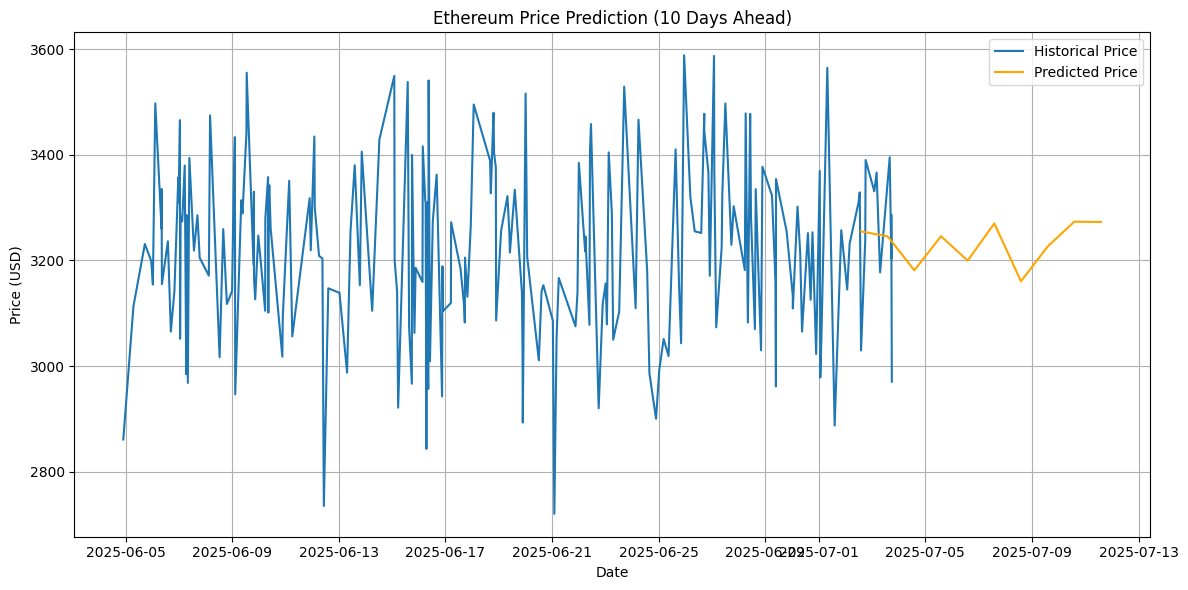

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load and preprocess dataset
file_path = 'crypto_sentiment_prediction_dataset.csv'
df = pd.read_csv(file_path)

# Convert timestamp if available
if 'timestamp' in df.columns:
    df['timestamp'] = pd.to_datetime(df['timestamp'])

# Show available cryptocurrencies
available_cryptos = df['cryptocurrency'].unique().tolist()
print("🪙 Available cryptocurrencies in dataset:", available_cryptos)

# User input
crypto_input = input("Enter the cryptocurrency name to predict (e.g., Bitcoin): ").strip()
future_days = int(input("Enter number of future days to predict: "))

# Validate input
if crypto_input not in available_cryptos:
    raise ValueError(f"❌ '{crypto_input}' not found in dataset. Available: {available_cryptos}")

# Filter for selected crypto
crypto_df = df[df['cryptocurrency'] == crypto_input].copy()

# Sort by date
crypto_df.sort_values(by='timestamp', inplace=True)
crypto_df.reset_index(drop=True, inplace=True)

# Target: predict future 'current_price_usd'
crypto_df['Target'] = crypto_df['current_price_usd'].shift(-future_days)

# Features (you can modify or add more):
features = [
    'price_change_24h_percent',
    'trading_volume_24h',
    'market_cap_usd',
    'social_sentiment_score',
    'news_sentiment_score',
    'fear_greed_index',
    'volatility_index',
    'rsi_technical_indicator'
]

# Drop rows with NaNs
crypto_df = crypto_df.dropna(subset=features + ['Target'])

# Prepare data
X = np.array(crypto_df[features])
y = np.array(crypto_df['Target'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict future prices
X_future = np.array(crypto_df[features])[-future_days:]
predictions = model.predict(X_future)

# Plot
future_dates = pd.date_range(start=crypto_df['timestamp'].iloc[-future_days], periods=future_days)

plt.figure(figsize=(12, 6))
plt.plot(crypto_df['timestamp'], crypto_df['current_price_usd'], label='Historical Price')
plt.plot(future_dates, predictions, label='Predicted Price', color='orange')
plt.title(f"{crypto_input} Price Prediction ({future_days} Days Ahead)")
plt.xlabel("Date")
plt.ylabel("Price (USD)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
